## Milestone 1

## Source : https://www.kaggle.com/datasets/mdwaquarazam/shoe-dataset

## 1. Perkenalan
Nama : Fachmi Maris

Bacth   : 002

## 2. Identifikasi Masalah
Dataset ini berisi informasi tentang penjualan sepatu yang dikumpulkan dari database produk Amazon. Dataset utama terdiri dari kolom nama brand, jumlah yang terjual, harga saat ini, detail produk, dan rating. Tanggal mulai cakupan data sementara 21/07/2022

## Problem Statement
Meninjau keterkaitan antara income tertinggi dengan rating berdasarkan dataset produk sepatu yang dijual di Amazon dalam kurun waktu cakupan data sementara untuk dievaluasi dan menjadi bahan acuan di tahun berikutnya.

Ada beberapa hal yang peneliti sampaikan dari dataset ini, yaitu :

1. Berapa total jumlah terjual berdasarkan Brand Name?

2. Berapa total jumlah terjual berdasarkan Produk detail?

3. Berapa rata-rata rating berdasarkan Brand Name?

4. Berapa rata-rata rating berdasarkan Produk detail?

5. Brand Name mana yang menghasilkan Income terbanyak?

6. Produk detail yang menghasilkan Income terbanyak?

7. Berapa mean, median, dan modus berdasarkan data yang terukur ?

8. Dibandingkan antara rating dengan jumlah produk terjual, mana yang paling berkaitan dengan jumlah income?

## Memanggil library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

## 3. Data Loading

Bagian ini berisi proses data loading dan eksplorasi data sederhana. Cantumkan query SQL masing-masing data yang di-load jika menggunakan dari BigQuery atau server SQL lainnya. Tampilkan pulai datanya.

In [2]:
df = pd.read_csv("D:\Milestone 1\MEN_SHOES.csv")
df

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,2242,1098.0,Oxygen-01 Sports RunningWalking & Gym Shoes wi...,3.8
1,ASIAN,240,674.0,Men's Express-08 Sports RunningWalkingGymTrain...,4.0
2,ASIAN,16662,588.0,Men's Cosko Sports RunningWalkingGymTraining S...,3.8
3,ASIAN,135,599.0,Wind-03 Sports RunningWalking & Gym Shoes with...,4.0
4,Reebok,240,982.0,Men's Velocity Runner Lp Running Shoe,4.0
...,...,...,...,...,...
23935,Campus,198,623.0,Men's HARVEL PRO Running Shoes,4.0
23936,Wakefield,49,399.0,Stylish Running Sports Shoes for MEN-2010,3.4
23937,URJO,557,839.0,Mens Running Shoes,4.2
23938,FEETEES,63,349.0,Nexon Men's Casual Eva Socks Knitted Running S...,3.6


## 4. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  int64  
 2   Current_Price    23142 non-null  float64
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 935.3+ KB


Dataset ini terdapat missing value pada Current Price lalu dilakukan pembuangan data

In [4]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23142 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23142 non-null  object 
 1   How_Many_Sold    23142 non-null  int64  
 2   Current_Price    23142 non-null  float64
 3   Product_details  23142 non-null  object 
 4   RATING           23142 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().to_frame()

,0
Brand_Name,0
How_Many_Sold,0
Current_Price,0
Product_details,0
RATING,0


Dataframe di atas menjelaskan bahwa tidak ada missing values setelah data dibersihkan.

## 5. Analisis dan Perhitungan

Bagian ini berisi proses analisis, penjelasan, perhitungan statistik deskriptif, inferensial, serta pembuatan visualisasi data. Untuk visualisasi data wajib memberikan insight di tiap visualisasinya.



In [6]:
df['Current_Price']=df['Current_Price'].astype('int')

C:\Users\fachm\AppData\Local\Temp\ipykernel_70600\53543871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current_Price']=df['Current_Price'].astype('int')


In [7]:
df['Income']=df['How_Many_Sold']*df['Current_Price']


C:\Users\fachm\AppData\Local\Temp\ipykernel_70600\2083341695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income']=df['How_Many_Sold']*df['Current_Price']


In [8]:
df

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING,Income
0,ASIAN,2242,1098,Oxygen-01 Sports RunningWalking & Gym Shoes wi...,3.8,2461716
1,ASIAN,240,674,Men's Express-08 Sports RunningWalkingGymTrain...,4.0,161760
2,ASIAN,16662,588,Men's Cosko Sports RunningWalkingGymTraining S...,3.8,9797256
3,ASIAN,135,599,Wind-03 Sports RunningWalking & Gym Shoes with...,4.0,80865
4,Reebok,240,982,Men's Velocity Runner Lp Running Shoe,4.0,235680
...,...,...,...,...,...,...
23935,Campus,198,623,Men's HARVEL PRO Running Shoes,4.0,123354
23936,Wakefield,49,399,Stylish Running Sports Shoes for MEN-2010,3.4,19551
23937,URJO,557,839,Mens Running Shoes,4.2,467323
23938,FEETEES,63,349,Nexon Men's Casual Eva Socks Knitted Running S...,3.6,21987


Dataframe di atas adalah data yang diambil dari kaggle sesuai source. Data di atas merupakan data yang sudah dibersihkan missing valuesnya. Sebelum dibersihkan Dataframe terdiri dari 23940 baris dan setelah dibersihkan dataframe terdiri dari 23142 baris. Dataframe di atas ditambahkan tabel kolom Income yang merupakan hasil perkalian kolom How_Many_Sold dan Current_Price. kolom Current_price menggunakan mata uang rupee.

### 1.Total jumlah terjual berdasarkan Brand Name 

In [9]:
df_1 = df.groupby("Brand_Name")["How_Many_Sold"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1

,Brand_Name,How_Many_Sold
0,ASIAN,41238645
1,Sparx,18142929
2,Bourge,7480053
3,Campus,5950287
4,Kraasa,2793798
5,BATA,2372055
6,Adidas,2120286
7,Reebok,1242486
8,D Shoes,594510
9,Nivia,380646


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

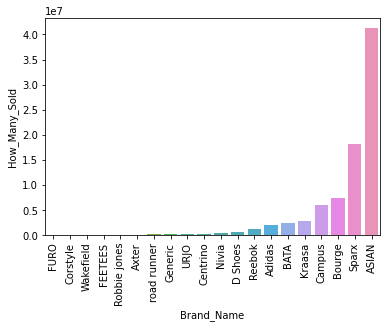

In [10]:
ax =sns.barplot(x='Brand_Name', y='How_Many_Sold', data=df_1.sort_values(by="How_Many_Sold"))
plt.xticks(rotation=90)
plt.tight_layout

Berdasarkan dataframe df_1 dapat disimpulkan bahwa Brand_Name ASIAN adalah brand dengan total jumlah produk yang terjual terbanyak dalam dataset shoes. Brand_Name dengan nama familiar di telinga orang Indonesia seperti BATA,Adidas, dan Reebok berada diurutan 5,6,dan 7 berdasarkan total produk terjual. Nomor urut terakhir diduduki oleh Brand_Name Furo.

### 2.Total jumlah terjual berdasarkan Product detail

In [11]:
df_2 = df.groupby("Product_details")["How_Many_Sold"].sum().sort_values(ascending=False).to_frame().reset_index()
df_2

,Product_details,How_Many_Sold
0,Men's Wonder-13 Sports Running Shoes,28971789
1,Men's Sd0323g Sneakers,15496761
2,Men's Loire-z1 Running Shoes,7480053
3,Men's Cosko Sports RunningWalkingGymTraining S...,6648138
4,Men's Century-12 Sports Running Shoes WalkingG...,3077088
5,Men SocksFit Walking and Running Shoes,2457441
6,Mens Stonic Running Shoes,2270310
7,Men's Yking 2.0 Running Shoes,1991808
8,Mens First Running Shoe,1828617
9,Men's Running Shoes,1409268


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

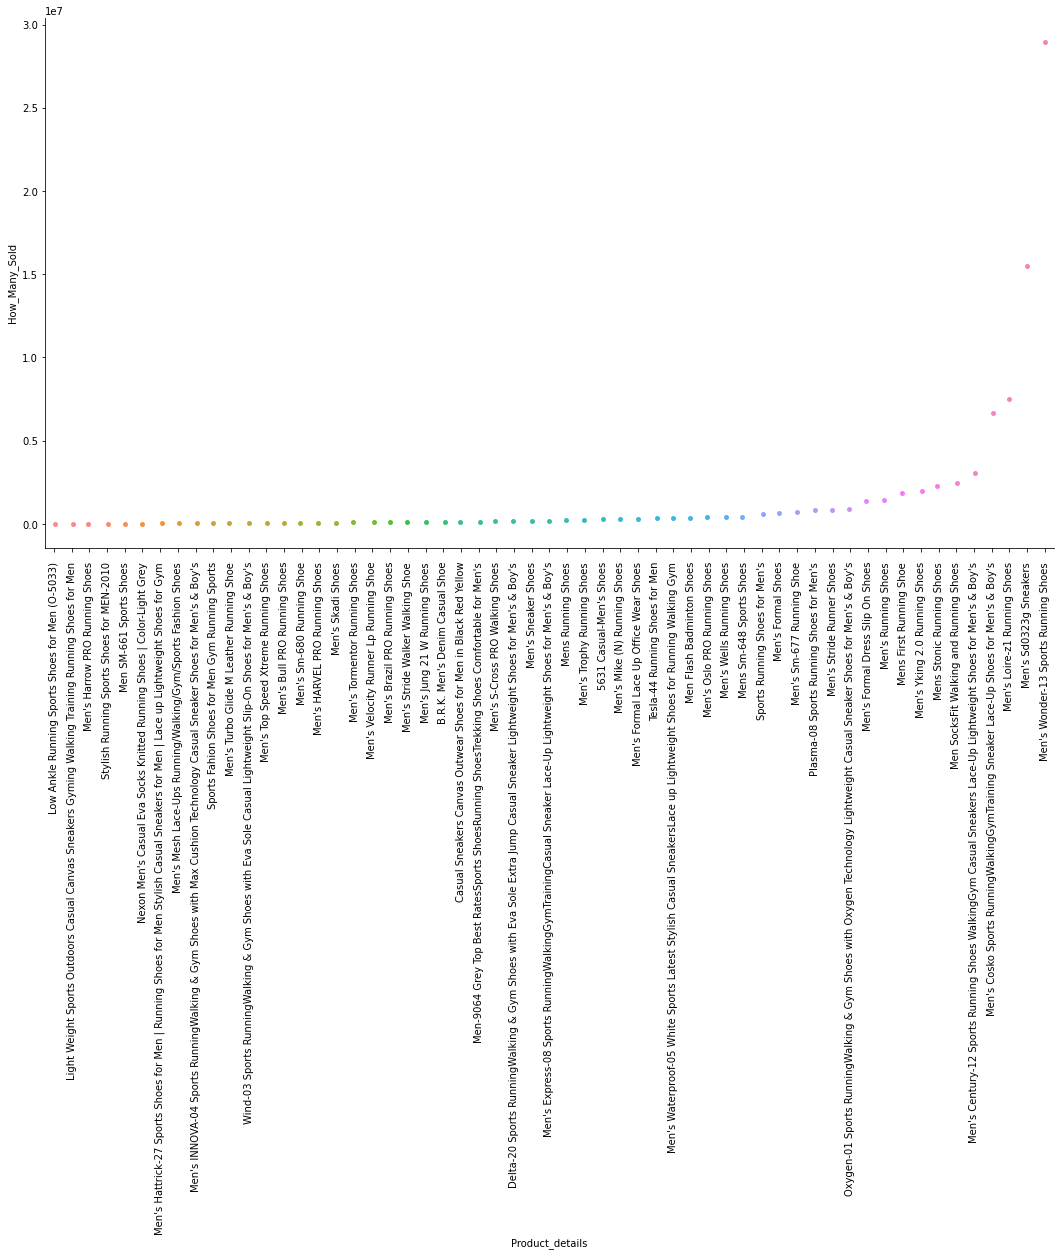

In [12]:
ax_2=sns.catplot(x= "Product_details", y="How_Many_Sold", data=df_2.sort_values(by="How_Many_Sold"), height=8.27, aspect=20/8.27)
plt.xticks(rotation=90)
plt.figure
plt.tight_layout


Berdasarkan dari data df_2 dapat disimpulkan bahwa banyak tipe sepatu dari berbagai brand yaitu 57 tipe sepatu. Produk sepatu tipe Men's Wonder-13 Sports Running Shoes berasal dari brand ASIAN menjadi tipe sepatu dengan penjualan terbanyak yaitu sebesar 28.971.789pcs dan tipe Low Ankle Running Sports Shoes for Men (O-5033) yang berasal dari brand name Furo menjadi penjualan terkecil yaitu hanya 798pcs saja.

In [13]:
Product_detail_by_Brand_Name = df.groupby('Brand_Name')['Product_details'].unique()
for i in Product_detail_by_Brand_Name.index:
    print('\n{}:'.format(i))
    for j in Product_detail_by_Brand_Name[i]:
        print('\t{}'.format(j))


ASIAN:
	Oxygen-01 Sports RunningWalking & Gym Shoes with Oxygen Technology Lightweight Casual Sneaker Shoes for Men's & Boy's  
	Men's Express-08 Sports RunningWalkingGymTrainingCasual Sneaker Lace-Up Lightweight Shoes for Men's & Boy's  
	Men's Cosko Sports RunningWalkingGymTraining Sneaker Lace-Up Shoes for Men's & Boy's  
	Wind-03 Sports RunningWalking & Gym Shoes with Eva Sole Casual Lightweight Slip-On Shoes for Men's & Boy's  
	Men's Wonder-13 Sports Running Shoes  
	Men's Century-12 Sports Running Shoes WalkingGym Casual Sneakers Lace-Up Lightweight Shoes for Men's & Boy's  
	Plasma-08 Sports Running Shoes for Men's  
	Delta-20 Sports RunningWalking & Gym Shoes with Eva Sole Extra Jump Casual Sneaker Lightweight Shoes for Men's & Boy's  
	Men's Hattrick-27 Sports Shoes for Men | Running Shoes for Men Stylish Casual Sneakers for Men | Lace up Lightweight Shoes for Gym  
	Men's Waterproof-05 White Sports Latest Stylish Casual SneakersLace up Lightweight Shoes for Running Walking 

### 3.Brand Name berdasarkan rata-rata rating

In [14]:
df_3 = df.groupby("Brand_Name")['RATING'].mean().sort_values(ascending=False).to_frame().reset_index()
df_3

,Brand_Name,RATING
0,Adidas,4.200000
1,URJO,4.200000
2,Sparx,4.133333
3,Campus,4.066667
4,Bourge,4.000000
5,Nivia,4.000000
6,BATA,3.933333
7,Reebok,3.920000
8,ASIAN,3.833333
9,Centrino,3.800000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

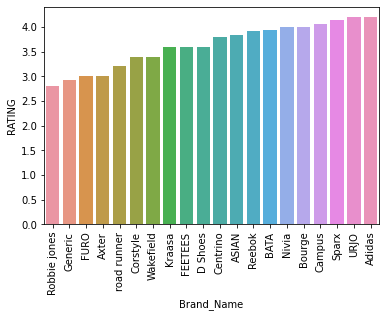

<Figure size 1080x576 with 0 Axes>

In [15]:
ax_3 =sns.barplot(x='Brand_Name', y='RATING', data=df_3.sort_values(by="RATING"))
plt.xticks(rotation=90)
plt.figure(figsize=(15,8))
plt.tight_layout

Berdasarkan data df_3 di atas, Brand Adidas dan Urjo menjadi brand dengan rata rata rating tertinggi, yaitu sebesar 4,2. Rating terendah diduduki oleh Robbie Jones yang hanya 2,8 saja. Rating yang terukur bisa diasumsikan menjadi tingkat kepuasan pembeli yang memberi penilaian.

### 4.Product_detail berdasarkan rata-rata rating

In [16]:
df_4 = df.groupby("Product_details")['RATING'].mean().sort_values(ascending=False).to_frame().reset_index()
df_4

,Product_details,RATING
0,Men's Running Shoes,4.4
1,Men's Skadi Shoes,4.4
2,Men's Sd0323g Sneakers,4.2
3,Mens Sm-648 Sports Shoes,4.2
4,Mens Running Shoes,4.2
5,Men's S-Cross PRO Walking Shoes,4.2
6,Men's Yking 2.0 Running Shoes,4.2
7,Men's Wells Running Shoes,4.2
8,Men's Brazil PRO Running Shoes,4.2
9,Men's Bull PRO Running Shoes,4.2


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

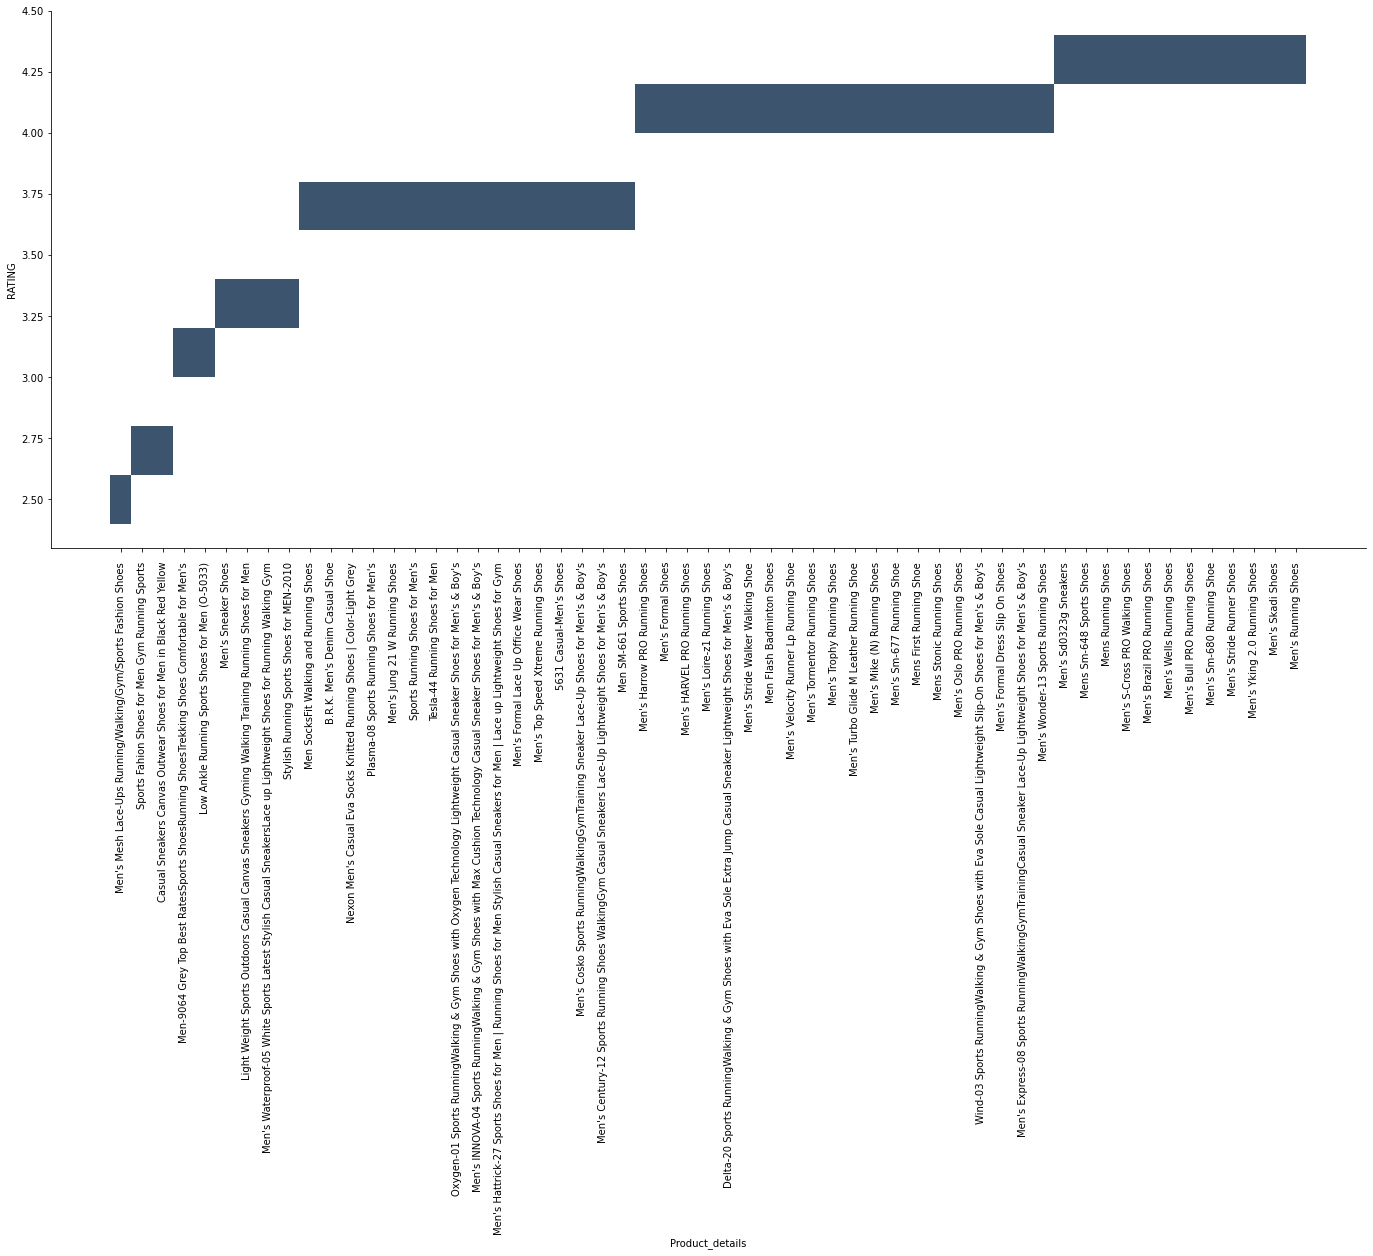

<Figure size 1080x576 with 0 Axes>

In [17]:
ax_4 =sns.displot(x='Product_details', y='RATING', data=df_4.sort_values(by="RATING"), height=8.27, aspect=20/8.27)
plt.xticks(rotation=90)
plt.figure(figsize=(15,8))
plt.tight_layout

Berdasarkan data df_4 dapat disimpulkan bahwa tipe sepatu Men's Running Shoes yang berasal dari brand name Sparx dan tipe sepatu Men's Skadi Shoes yang berasal dari brand name Adidas memiliki rata-rata rating tertinggi sebesar 4.4. Men's Mesh Lace-Ups Running/Walking/Gym/Sports Fashion Shoes yang berasal dari Generic menjadi nomor urut terakhir karena hanya memiliki rating 2.4. Rating yang terukur bisa diasumsikan menjadi tingkat kepuasan pembeli.

### 5.Brand Name dengan Income terbanyak

In [18]:
df_5 = df.groupby("Brand_Name")["Income"].sum().sort_values(ascending=False).to_frame().reset_index()
df_5

,Brand_Name,Income
0,ASIAN,21903470085
1,Sparx,12713029770
2,Campus,6218065476
3,Bourge,5228557047
4,Adidas,3228229998
5,BATA,1962503445
6,Reebok,1327177740
7,Kraasa,1159460883
8,D Shoes,385836990
9,Nivia,325452330


In [19]:
df_5["Income"].sum()

55120635843

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

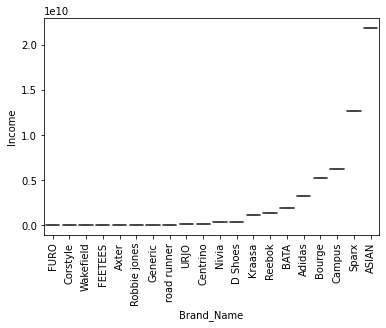

<Figure size 1296x1296 with 0 Axes>

In [20]:
ax_5=sns.boxplot(x="Brand_Name", y="Income", data=df_5.sort_values(by="Income"))
plt.xticks(rotation=90)
plt.figure(figsize=(18,18))
plt.tight_layout
plt.tight_layout

Berdasarkan data di atas, dapat disimpulkan bahwa income yang berasal dari brand ASIAN menjadi peringkat pertama yaitu sebesar 21.903.470.085 rupee. Angka ini cukup fantastis jika ditinjau dari income brand peringkat dua yang diduduki oleh brand Sparx yang memiliki income sebesar 12.713.029.770 rupee, maka income brand Sparx hanya sekitar 58% dari income brand ASIAN. Income brand ASIAN memiliki persentase sebesar 39.73% dari income yang berasal dari seluruh brand. Brand FURO menjadi brand dengan income terkecil yang hanya 1.036.602 rupee atau sekitar 0,001% dari income secara keseluruhan brand.

### 6.Product detail dengan Income terbanyak

In [21]:
df_6=df.groupby("Product_details")["Income"].sum().sort_values(ascending=False).to_frame().reset_index()
df_6

,Product_details,Income
0,Men's Wonder-13 Sports Running Shoes,14427950922
1,Men's Sd0323g Sneakers,9871436757
2,Men's Loire-z1 Running Shoes,5228557047
3,Men's Cosko Sports RunningWalkingGymTraining S...,3909105144
4,Men's Yking 2.0 Running Shoes,2957834880
5,Mens First Running Shoe,2558235183
6,Mens Stonic Running Shoes,2045549310
7,Men's Running Shoes,1734808908
8,Men's Century-12 Sports Running Shoes WalkingG...,1612394112
9,Men's Formal Dress Slip On Shoes,1099225848


In [22]:
df_6["Income"].sum()

55120635843

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

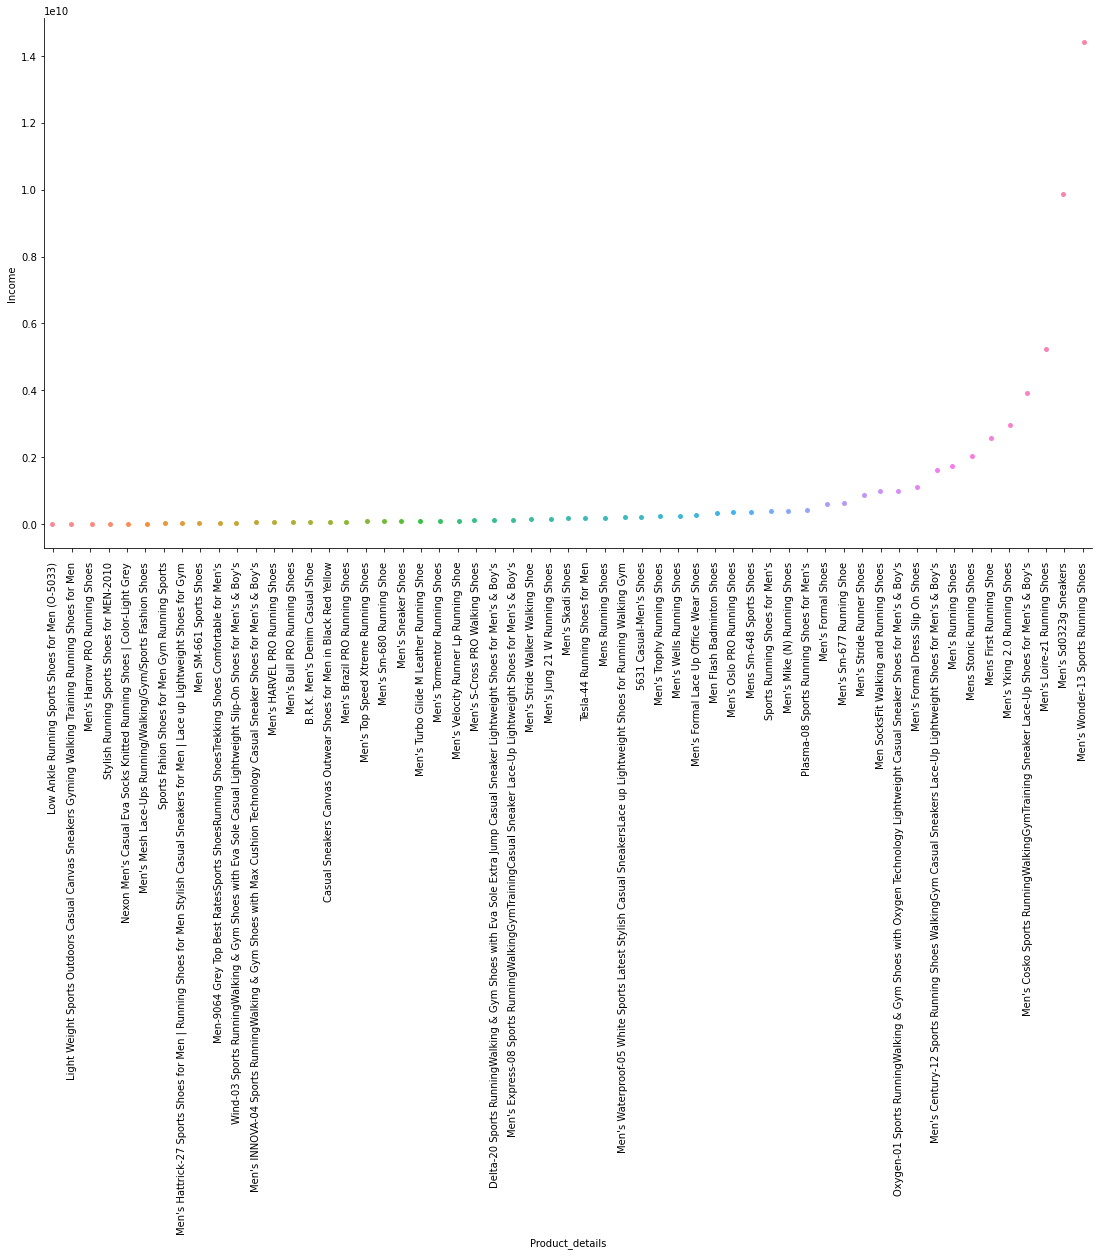

<Figure size 1296x1296 with 0 Axes>

In [23]:
ax6=sns.catplot(x="Product_details", y="Income", data=df_6.sort_values(by="Income"), height=8.27, aspect=20/8.27)
plt.xticks(rotation=90)
plt.figure(figsize=(18,18))
plt.tight_layout
plt.tight_layout

Berdasarkan data di atas dapat disimpulkan bahwa Men's Wonder-13 Sports Running Shoes menghasilkan income terbesar dibanding jenis sepatu yang lain yaitu sebesar 14.427.950.922 rupee. Jumlah ini adalah 65.87% dari income yang diperolah Brand ASIAN. Income Men's Wonder-13 Sports Running Shoes memiliki persentase sebesar 26.175% dibandingkan income keseluruhan penjualan brand. Low Ankle Running Sports Shoes for Men (O-5033) menjadi tipe sepatu yang menghasilkan	1.036.602 rupeeh. Tipe ini merupakan satu satunya tipe yang dijual dari brand Furo.

## Rekapitualisasi Tabel berdasarkan Brand denga rata rata rating tertinggi

In [24]:
df_3_1=df_3.merge(df_1, on=['Brand_Name'], how='left')
df_3_1=df_3_1.merge(df_5, on=["Brand_Name"], how='left')
df_3_1


,Brand_Name,RATING,How_Many_Sold,Income
0,Adidas,4.200000,2120286,3228229998
1,URJO,4.200000,222243,186461877
2,Sparx,4.133333,18142929,12713029770
3,Campus,4.066667,5950287,6218065476
4,Bourge,4.000000,7480053,5228557047
5,Nivia,4.000000,380646,325452330
6,BATA,3.933333,2372055,1962503445
7,Reebok,3.920000,1242486,1327177740
8,ASIAN,3.833333,41238645,21903470085
9,Centrino,3.800000,272118,206537562


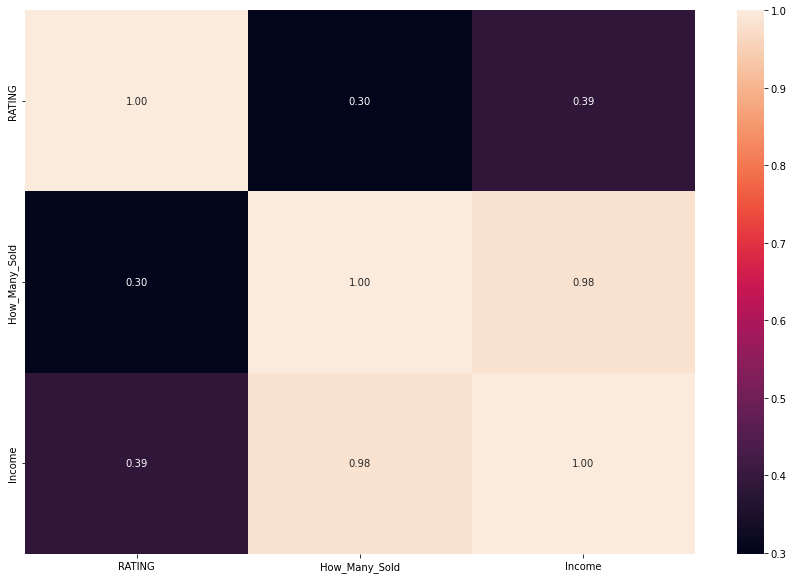

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_3_1.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan rekapitualisasi di atas dapat disimpulkan bahwa Income tidak terlalu dipengaruhi oleh rating karena nilai keterikatannya sebesar 0.39. Income sangat dipengaruhi oleh banyaknya jumlah produk yang terjual yaitu 0.98. Kesimpulannya rating yang tertinggi tidak menjamin menghasilkan income yang tertinggi pula.
Brand Adidas dan Urjo yang memiliki rata-rata rating tertinggi sebesar 4.2 apabila income kedua brand tersebut digabung yaitu 3228229998 rupee + 186461877 rupee = 3,414,691,875 rupee tidak sebanding dengan brand ASIAN yang hanya memiliki rata-rata rating  3.83 namun memiliki income sebesar 21.903.470.085 rupee

## Rekapitualisasi Tabel berdasarkan Product Detail denga rata rata rating tertinggi

In [26]:
df_2_4_6=df_4.merge(df_2, on=["Product_details"], how="left")
df_2_4_6=df_2_4_6.merge(df_6, on=["Product_details"], how="left")
df_2_4_6

,Product_details,RATING,How_Many_Sold,Income
0,Men's Running Shoes,4.4,1409268,1734808908
1,Men's Skadi Shoes,4.4,82194,177456846
2,Men's Sd0323g Sneakers,4.2,15496761,9871436757
3,Mens Sm-648 Sports Shoes,4.2,427728,363141072
4,Mens Running Shoes,4.2,222243,186461877
5,Men's S-Cross PRO Walking Shoes,4.2,152418,110045796
6,Men's Yking 2.0 Running Shoes,4.2,1991808,2957834880
7,Men's Wells Running Shoes,4.2,422940,249534600
8,Men's Brazil PRO Running Shoes,4.2,97755,68624010
9,Men's Bull PRO Running Shoes,4.2,65835,51285465


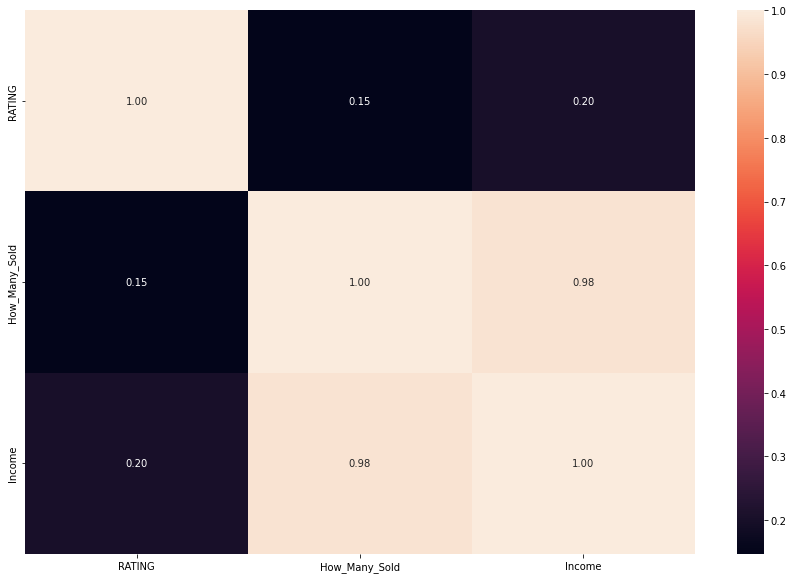

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_2_4_6.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan rekapitualisasi di atas dapat disimpulkan bahwa Income tidak terlalu dipengaruhi oleh rating karena nilai keterikatannya sebesar 0.20. Income sangat dipengaruhi oleh banyaknya jumlah produk yang terjual yaitu 0.98. Kesimpulannya rating yang tertinggi tidak menjamin menghasilkan income yang tertinggi pula.
tipe sepatu Men's Wonder-13 Sports Running Shoes tidak memiliki rating tertinggi namun bisa menghasilkan income terbesar yaitu sebesar 14427950922 rupee. sedangkan rata-rata rating tertinggi seperti Men's Running Shoes dan Men's Skadi Shoes yang memiliki rating sebesar 4.4 tidak mampu mengimbangi income yang dihasilkan oleh tipe sepatu Men's Wonder-13 Sports Running Shoes.

## 7.Statistik Deskriptif : 

Menghitung Centra Tendency = Mean,Median,dan Modus

In [28]:
print(" Mean : " + str(df["RATING"].mean()))
print(" Median : " + str(df["RATING"].median()))
print(" Modus : " + str(df["RATING"].mode()[0]))

 Mean : 3.8206896551724263
 Median : 4.0
 Modus : 4.0


In [29]:
print(" Mean : " + str(df["How_Many_Sold"].mean()))
print(" Median : " + str(df["How_Many_Sold"].median()))
print(" Modus : " + str(df["How_Many_Sold"].mode()[0]))

 Mean : 3607.896551724138
 Median : 406.5
 Modus : 240


In [30]:
print(" Mean : " + str(df["Income"].mean()))
print(" Median : " + str(df["Income"].median()))
print(" Modus : " + str(df["Income"].mode()[0]))

 Mean : 2381844.0862068967
 Median : 419164.0
 Modus : 161760


In [31]:
numcolumn=["RATING", "How_Many_Sold", "Income" ]

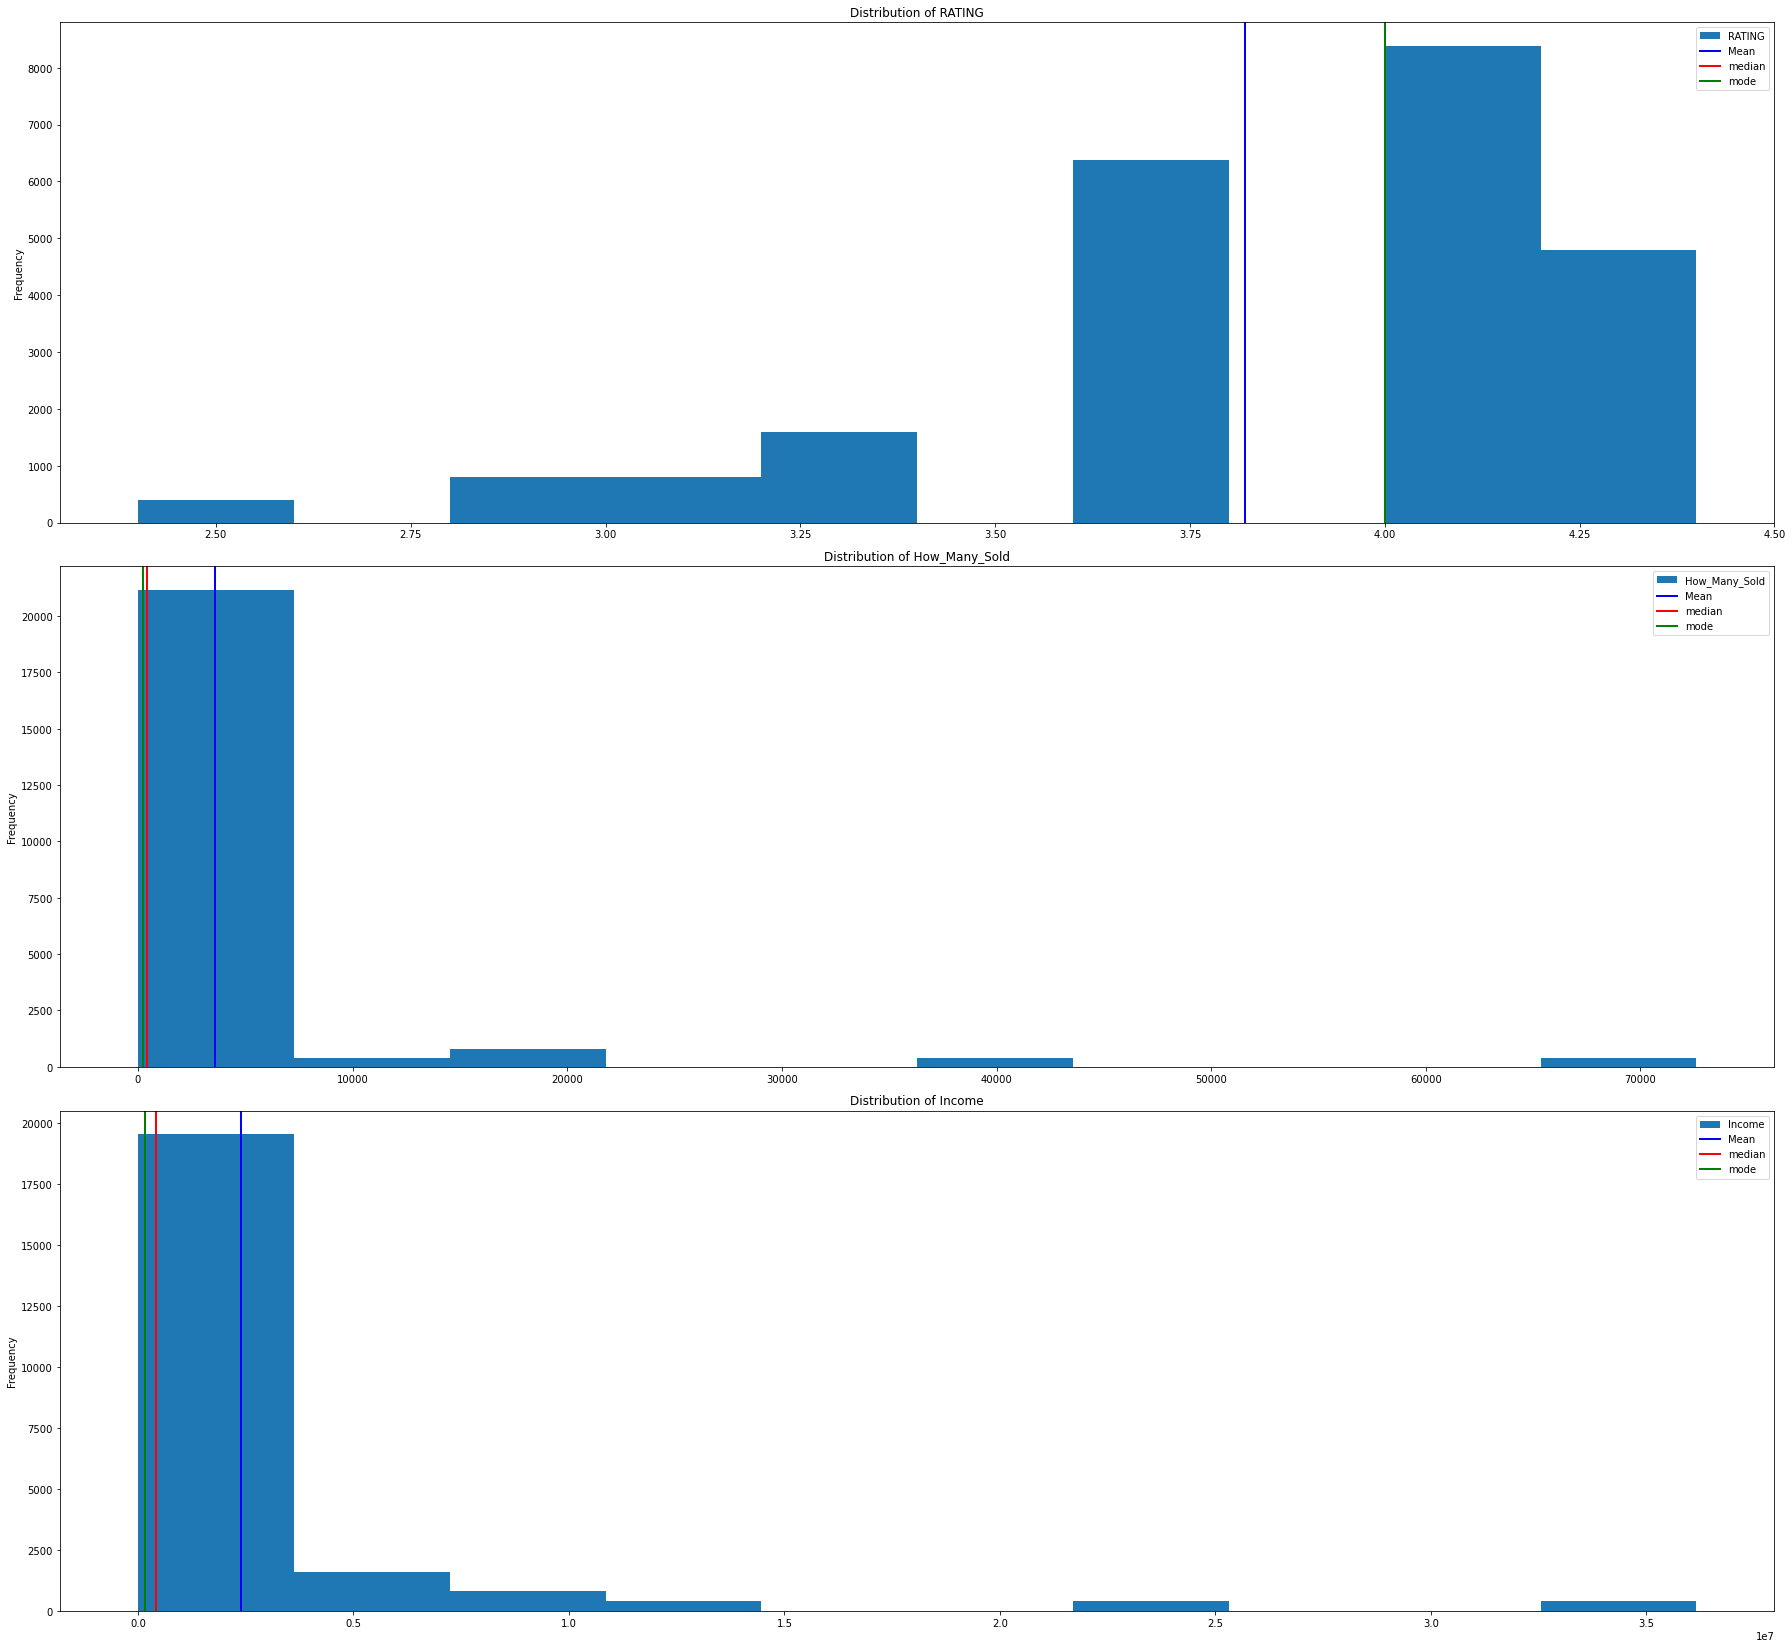

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(25, 23))
for c, ax in zip(numcolumn, axes):
    df[[c]].plot(kind='hist', ax=ax)
    mean = df[c].mean()
    median = df[c].median()
    mode = df[c].mode()[0]
    ax.axvline(mean, color='blue', linewidth=2, label=f'Mean');
    ax.axvline(median, color='red', linewidth=2, label=f'median');
    ax.axvline(mode, color='green', linewidth=2, label=f'mode');
    ax.set_title(f'Distribution of {c}')
    ax.legend();

plt.tight_layout()

Central Tendency :

Rating : Kondisinya adalah mean berada di bawah median, dan median sama dengan modus maka kurva frekuensi menceng ke kanan. Pemusatan data berada di area kanan grafik tepatnya di atas 3.5 sehingga kemungkinan besar data are sebelah kiri merupakan outlier. mean tertarik sedikit ke kiri karena dipengaruhi outlier. 

How_Many_Sold : kondisinya adalah mean di atas median dan modus, maka kurva akan menceng kiri. Pemusatan data berada di area sebelah kiri. mean pun tertarik ke area kiri karena outlier berada di area kanan.

Income : Kondisinya adalah mean berada di atas median dan modus maka kurva akan menceng ke kiri. Pemusatan data berada di area sebelah kiri. Kemungkinan besar area bagian kanan merupakan data outlier.


## 8.Statistik Inferensial : Menghitung Chi-squared


Apakah Rating tertinggi 4,2 yang dimiliki Adidas dan URJO berbeda signifikan dengan rating 3,83 yang dimiliki brand ASIAN?

H0 = Rating brand = 4,2 signifikan dengan rating income tertinggi

H1 = Rating brand = 4,2 tidak siginifikan dengan rating income tertinggi 

In [33]:
# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(df_3_1["RATING"],4.2)

print('P-value: ', p_val)
print("t-statistic:",t_stat)

P-value:  1.9672912568038623e-05
t-statistic: -5.6343740181765485


d:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


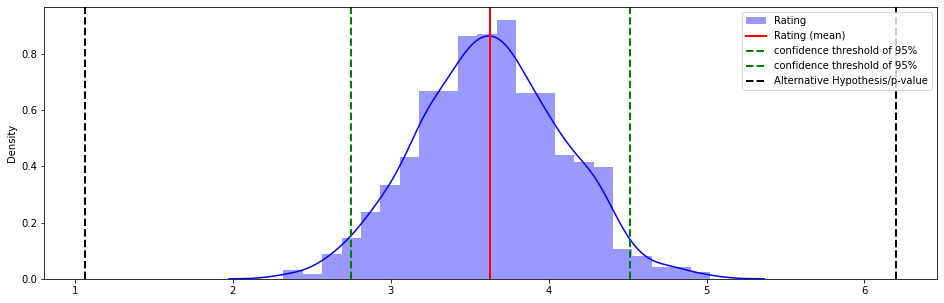

In [34]:
from statistics import mean


pop = np.random.normal(df_3_1["RATING"].mean(), df_3_1["RATING"].std(), 1000)

ci = stats.norm.interval(0.95, df_3_1["RATING"].mean(), df_3_1["RATING"].std())

plt.figure(figsize=(16,5))
sns.distplot(pop, label="Rating", color= "blue")
plt.axvline(df_3_1["RATING"].mean(), color="red", linewidth=2, label= "Rating (mean)")

plt.axvline(ci[1], color="green", linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color="green", linestyle='dashed', linewidth=2, label='confidence threshold of 95%')


plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Berdasarkan data untuk perhitungan di atas,
Nilai P-Value > nilai alpha
kesimpulannya adalah H=0 ditolak dan kesimpulan H1 diterima
H1 = Rating brand = 4,2 tidak siginifikan dengan rating income tertinggi

Rata rata rating tertinggi tidak menjamin akan menghasilkan income tertinggi seperti halnya Adidas dan URJO	 yang memiliki rata-rata rating tertinggi namun tidak memiliki income sebanding dengan brand Asian yang hanya memiliki rating 3.83 

## 9.Kesimpulan

Berdasarkan data-data di atas dapat disimpulkan bahwa :

a. Brand Name dengan jumlah produk terjual terbanyak adalah Brand ASIAN sebanyak 21.903.470.085 pcs dan Brand Name dengan jumlah produk terjual terkecil adalah Brand FURO hanya 798 pcs. Produk detail dengan jumlah produk terjual terbanyak adalah produk tipe sepatu Men's Wonder-13 Sports Running Shoes yang merupakan bagian dari Brand ASIAN sebanyak 28.971.789pcs dan tipe Low Ankle Running Sports Shoes for Men (O-5033) yang berasal dari brand name Furo menjadi penjualan terkecil yaitu hanya 798pcs saja.

b. Brand dengan rata-rata rating tertinggi adalah brand Adidas dan Urjo dengan nilai 4.2 sedangkan Brand Name terendah adalah brand Robbie jones dengan nilai rata-rata rating 2.80. Produk detail dengan rata-rata nilai tertinggi yaitu Men's Running Shoes yang merupakan bagian dari Brand Sparx dan Men's Skadi Shoes yang merupakan bagian dari Adidas dengan nilai rata-rata rating sebesar 4.4. Produk detail terendah adalah Men's Mesh Lace-Ups Running/Walking/Gym/Sports Fashion Shoes yang berasal dari Generic menjadi nomor urut terakhir karena hanya memiliki nilai rata-rata rating 2.4.

c. Brand Name dengan income terbesar adalah brand ASIAN	dengan total income sebesar 21.903.470.085 rupee. Brand Name dengan income terkecil adalah brand FURO dengan produk Low Ankle Running Sports Shoes for Men (O-5033) income sebesar 1.036.602 rupee. Produk detail yang menghasilkan income terbesar adalah produk Men's Wonder-13 Sports Running Shoes  sebesar 14.427.950.922 rupee yang merupakan bagian dari brand ASIAN.

d. Berdasarkan penelitian di atas dapat disimpulkan bahwa income tidak dipengaruhi oleh rating. Income tertinggi seperti Brand Name ASIAN menghasilkan income terbesar namun, faktanya rata-rata rating yang dimiliki brand ASIAN hanya sebesar bernilai 3.83. Brand Name dengan rata-rata tinggi tertinggi seperti Brand Adidas dan Urjo yang bernilai 4.2 tidak memiliki income sebesar ASIAN meskipun income Adidas dan Urjo digabung. Berdasarkan heatmap yang dibuat menyatakan bahwa income lebih dipengaruhi oleh kolom "How many Sold" atau banyak  produk terjual dibandingkan dengan rating. Nilai keterkaitan antara income dengan banyak produk terjual adalah bernilai 0.98 sedangkan nilai keterkaitan antara Income dengan Rating hanya sebesar 0.39.

e. Central Tendency :

Rating :  Mean = 3.82 Median = 4.0 Modus = 4.0, pemusatan data cenderung berkumpul di area kanan terutama di atas rating 3.5. nilai mean tertarik ke sebelah kiri karena ditarik oleh nilai sebelah kiri. nilai di area kiri bisa dipastikan adalah outlier.

How Many Sold : Mean = 3607.89 Median = 406.5 Modus = 240, pemusatan data berada di area kiri. nilai mean tertarik ke area kanan karena nilai mean dipengaruhi oleh outlier yang berada di area kanan pada grafik. 

Income : meean = 2381844.08, Median = 419164.0 Modus = 161760, pemusatan data berada di area kiri. nilai mean tertarik ke area kanan karena nilai mean dipengaruhi oleh outlier yang berada di area kanan pada grafik. 

f. Rata rata rating tertinggi tidak menjamin akan menghasilkan income tertinggi seperti halnya Adidas dan URJO	yang memiliki rata-rata rating tertinggi sebesar 4.2, namun tidak memiliki income sebanding dengan brand Asian yang hanya memiliki rating 3.83 

[Tableu] https://public.tableau.com/views/Milestone1_Fachmi_Maris/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [35]:
df.to_csv("Dataframe_Utama.csv" ,index=False)